**Purpose** : EDA basics on Student dataset <br>
**Author** : Sagar<br>
**Self check** : Date<br>
**Peer Review** : Senior<br>
**Version** : SB1<br>


### 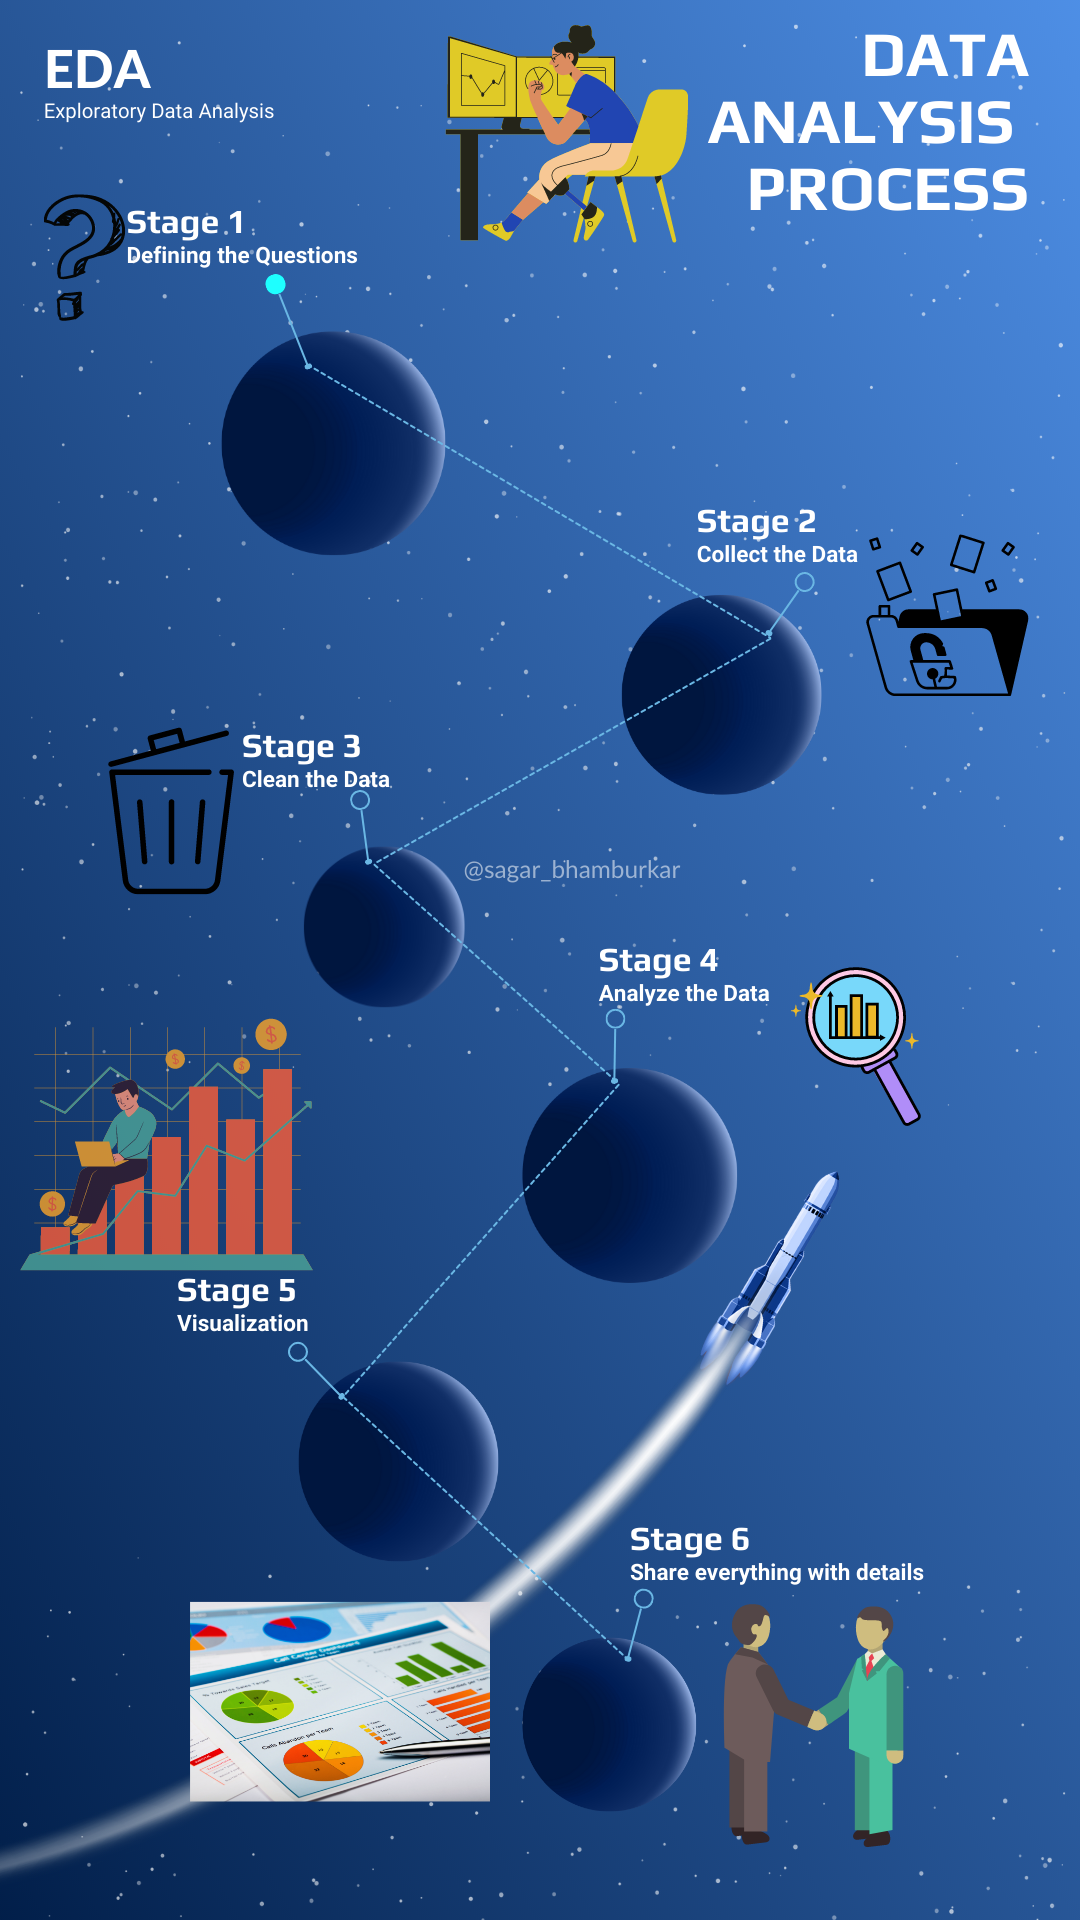

### TO DO:
- Check data type
- Check null values
- Seperate interger and object columns
- Find out highest Salary
- Highest Percentage
- Find out low salary
- Find out top 5 Salary
- Display a data from highest salary to lowest 
- Find count of people from particular city
- Find count of particular department
- Display some graphs
- Findout highes percentage
- Findout everythin with graphs (END)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Basic_EDA_dataset.csv')
df.head()

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000
1,2,Amit,Nanded,CS,62,25000
2,3,Amlan,Banglore,IT,67,30000
3,4,Bhavesh,Akola,MECH,90,35000
4,5,Bablu,Yavatmal,CS,87,40000


### 1) check data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr. no      49 non-null     int64 
 1   Name        49 non-null     object
 2   Location    49 non-null     object
 3   Department  49 non-null     object
 4   Percentage  49 non-null     int64 
 5   Salary      49 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.4+ KB


In [5]:
df['Sr. no'].dtype

dtype('int64')

### 2) Check null values

In [6]:
df.isnull().sum()

Sr. no        0
Name          0
Location      0
Department    0
Percentage    0
Salary        0
dtype: int64

### 3) Seperate interger and object columns

In [9]:
object_type = [i for i in df if df[i].dtypes == 'object']
print('Object type of columns in our dataset are : ', object_type)

Object type of columns in our dataset are :  ['Name ', 'Location', 'Department']


In [11]:
int_type = [i for i in df if df[i].dtypes == 'int64']
print('Integer type of columns in our dataset are : ', int_type)

Integer type of columns in our dataset are :  ['Sr. no', 'Percentage', 'Salary']


#### **Code Flow:** 
For each column name i, the code checks the data type of that column using the dtypes attribute of the DataFrame.<br>If the data type is "object", the condition df[i].dtypes == 'object' will be True, <br>and the column name i will be added to the object_type list using the append method.

#### **Difference between df[i].dtype and i.dtype ?**
<br>
If i is a string representing the name of a column in the DataFrame df, then df[i].dtype and i.dtype are equivalent,<br>
and they both return the data type of the column with the name i in df.<br>
<br>
But............<br>
lets take an example

In [12]:
data = {'Name': ['Sagar', 'Vishal', 'Dipak'], 'Age': [27, 30, 35]}
df_sample = pd.DataFrame(data)

column_name = 'Age' #i
column_obj = df_sample[column_name]  #df[i]

print(column_obj.dtype)  #int64
print(df_sample[column_name].dtype) #int64
print(column_name.dtype) # throws an AttributeError: 'str' object has no attribute 'dtype'

int64
int64


AttributeError: 'str' object has no attribute 'dtype'

### Explanation: 
Here, column_name is a *string* that represents the **name** of the Age *column* in the df DataFrame, <br>
while column_obj is an **actual column** of the df DataFrame.
<br>
<br>
column_obj.dtype and df[column_name].dtype return the same value of int64, since they both refer to the data type of the Age column in the DataFrame. <br>
<br>
However, column_name.dtype raises an AttributeError because column_name is a string object and not a Pandas Series object, so it doesn't have a dtype attribute.

### 4) Find out highest salary

In [13]:
df.head()

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000
1,2,Amit,Nanded,CS,62,25000
2,3,Amlan,Banglore,IT,67,30000
3,4,Bhavesh,Akola,MECH,90,35000
4,5,Bablu,Yavatmal,CS,87,40000


In [14]:
df['Salary'].head()

0    20000
1    25000
2    30000
3    35000
4    40000
Name: Salary, dtype: int64

In [16]:
df.Salary.tail()

44     84000
45     88000
46     92000
47     96000
48    100000
Name: Salary, dtype: int64

In [17]:
df.iloc[3]

Sr. no              4
Name          Bhavesh
Location        Akola
Department       MECH
Percentage         90
Salary          35000
Name: 3, dtype: object

In [18]:
df.iloc[3,5]  #row,column

35000

In [20]:
df.iloc[:,5].head()  # : --> take all rows

0    20000
1    25000
2    30000
3    35000
4    40000
Name: Salary, dtype: int64

In [22]:
df.iloc[13:,]  #13 : --> take all after 13 index

#iloc --> index based (mostly use)

,Sr. no,Name,Location,Department,Percentage,Salary
13,14,Hritik,Nagpur,CS,77,44000
14,15,Indrajeet,Warud,IT,59,48000
15,16,Jaydeep,Morshi,MECH,60,52000
16,17,Kapil,Karantaka,CS,81,56000
17,18,Karan,Amravati,CHEM,76,60000
18,19,Lalit,Pune,EL,88,64000
19,20,Lokesh,Kolhapur,CIVIL,99,68000
20,21,Manish,Sangli,ENTC,98,72000
21,22,Mahendra,Paratwada,ENTC,97,76000
22,23,Naresh,Moshi,CS,59,70000


In [23]:
df['Salary'].value_counts()

76000     3
72000     3
60000     3
80000     2
68000     2
56000     2
52000     2
48000     2
44000     2
64000     2
84000     2
88000     2
40000     2
92000     2
74000     1
86000     1
90000     1
78000     1
96000     1
82000     1
20000     1
70000     1
25000     1
36000     1
32000     1
65000     1
55000     1
50000     1
45000     1
35000     1
30000     1
100000    1
Name: Salary, dtype: int64

In [24]:
df['Department'].value_counts()

CS       16
ENTC     13
IT        4
MECH      4
CHEM      4
EL        4
CIVIL     4
Name: Department, dtype: int64

In [26]:
#Answer
df['Salary'].nlargest(1)

48    100000
Name: Salary, dtype: int64

In [27]:
#to print in details
df.nlargest(3, 'Salary')

,Sr. no,Name,Location,Department,Percentage,Salary
48,49,Sumant,Banglore,ENTC,75,100000
47,48,Vasant,Nanded,CS,69,96000
33,34,Vendant,Pune,ENTC,87,92000


#### Highest Percentage


In [28]:
df.nlargest(3, 'Percentage')

,Sr. no,Name,Location,Department,Percentage,Salary
40,41,Virat,Amravati,CS,100,68000
7,8,Dipak,Delhi,CIVIL,99,55000
19,20,Lokesh,Kolhapur,CIVIL,99,68000


### 5) Find out lowest salary

In [29]:
df.nsmallest(1, 'Salary')

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000


### 6) Display a data from highest salary to lowest 

In [30]:
df.head()

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000
1,2,Amit,Nanded,CS,62,25000
2,3,Amlan,Banglore,IT,67,30000
3,4,Bhavesh,Akola,MECH,90,35000
4,5,Bablu,Yavatmal,CS,87,40000


In [32]:
df.sort_values("Salary", ascending=False).head(10) #inplace = True  (mostly used)

,Sr. no,Name,Location,Department,Percentage,Salary
48,49,Sumant,Banglore,ENTC,75,100000
47,48,Vasant,Nanded,CS,69,96000
46,47,Prakash,Amravati,CS,67,92000
33,34,Vendant,Pune,ENTC,87,92000
32,33,Vaibhav,Satara,ENTC,90,90000
45,46,Dilip,Moshi,ENTC,64,88000
31,32,Ujwal,Akola,CIVIL,89,88000
30,31,Utkarsh,Delhi,EL,75,86000
44,45,Vaishanv,Paratwada,ENTC,65,84000
29,30,Tanmay,Amravati,CHEM,74,84000


In [33]:
df.head()

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000
1,2,Amit,Nanded,CS,62,25000
2,3,Amlan,Banglore,IT,67,30000
3,4,Bhavesh,Akola,MECH,90,35000
4,5,Bablu,Yavatmal,CS,87,40000


### 7) Find count of people from particular city

In [34]:
df['Location'].value_counts()

Amravati     7
Akola        4
Pune         4
Banglore     3
Nanded       3
Warud        2
Paratwada    2
Sangli       2
Kolhapur     2
Karantaka    2
Morshi       2
Mumbai       2
Nagpur       2
Pune         2
Satara       2
Delhi        2
Hydrabad     2
Yavatmal     2
Moshi        2
Name: Location, dtype: int64

In [35]:
#findout count of candidate from Amravati
df['Location'] == "Amravati"

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46     True
47    False
48    False
Name: Location, dtype: bool

In [36]:
df[df['Location'] == "Amravati"]  #df[]

,Sr. no,Name,Location,Department,Percentage,Salary
0,1,Abhishek,Amravati,ENTC,60,20000
6,7,Chetan,Amravati,EL,98,50000
17,18,Karan,Amravati,CHEM,76,60000
23,24,Omkar,Amravati,CS,70,72000
29,30,Tanmay,Amravati,CHEM,74,84000
40,41,Virat,Amravati,CS,100,68000
46,47,Prakash,Amravati,CS,67,92000


The df[df['Location'] == "Amravati"] code returns a **new DataFrame** with only the rows that meet a certain condition,<br>
while df['Location'] == "Amravati" code creates a **Boolean Series** that can be used to filter, select or manipulate data in various ways.

### 8) Find count of particular department

In [37]:
df['Department'].value_counts()

CS       16
ENTC     13
IT        4
MECH      4
CHEM      4
EL        4
CIVIL     4
Name: Department, dtype: int64

In [38]:
df[df['Department'] == 'CHEM']

,Sr. no,Name,Location,Department,Percentage,Salary
5,6,Chandu,Hydrabad,CHEM,90,45000
17,18,Karan,Amravati,CHEM,76,60000
29,30,Tanmay,Amravati,CHEM,74,84000
41,42,Aniket,Pune,CHEM,56,72000


### 9) Findout highest percentage

### 9) Display some graphs

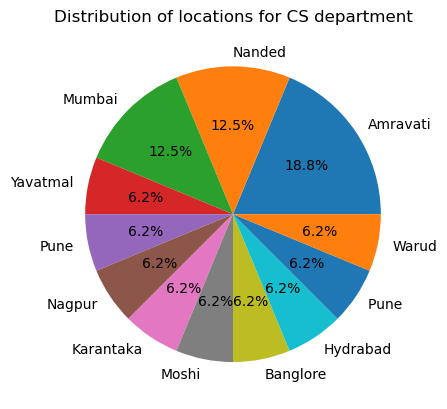

In [46]:
import matplotlib.pyplot as plt

cs_data = df[df['Department'] == 'CS']

location_count = cs_data['Location'].value_counts()

plt.pie(location_count.values, labels=location_count.index, autopct='%1.1f%%')
plt.title('Distribution of locations for CS department')
plt.show()

In [44]:
location_count.values

array([3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
location_count.index

Index(['Amravati', 'Nanded', 'Mumbai', 'Yavatmal', 'Pune', 'Nagpur',
       'Karantaka', 'Moshi', 'Banglore', 'Hydrabad', 'Pune ', 'Warud'],
      dtype='object')

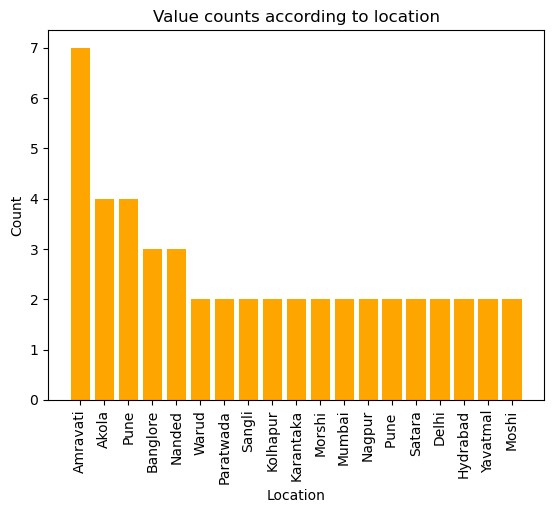

In [52]:
location_count = df['Location'].value_counts()
plt.bar(location_count.index, location_count.values, color='orange') #x,y
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Value counts according to location')

#to avoid overlopping
plt.xticks(rotation = 90)
plt.show()

### 10) Value count of every city in graph

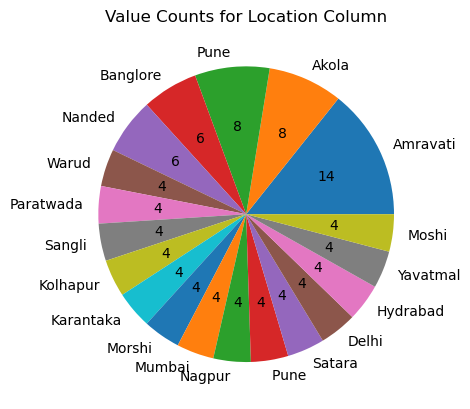

In [54]:
# Get the value counts for the 'Location' column
location_counts = df['Location'].value_counts()

# Create a pie chart
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.0f') #%1.1f%%
#sequence is important and labels is imp********************

# Set the title
plt.title('Value Counts for Location Column')

# Display the plot
plt.show()

### Upcoming topics :
    Same EDA with SQL
    Understand groupby which is very important for DA